In [1]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
data = pd.read_csv('/content/parkinsons disease data.csv')

# Define the features and the target
X = data.drop(['name', 'status'], axis=1)
y = data['status']

# Normalize features to be non-negative
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply Chi-Square feature selection
k = 10
chi2_selector = SelectKBest(chi2, k=k)
X_kbest = chi2_selector.fit_transform(X_scaled, y)

# Get the selected feature names
selected_features = X.columns[chi2_selector.get_support()]

# Display the selected features
print("Selected Features based on Chi-Square test:")
print(selected_features)


Selected Features based on Chi-Square test:
Index(['MDVP:Fo(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)',
       'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'spread1',
       'PPE'],
      dtype='object')


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

                 Model  Accuracy  F1 Score  Precision   Recall       MAE  \
2        Random Forest  0.948718  0.969697   0.941176  1.00000  0.051282   
1        Decision Tree  0.923077  0.953846   0.939394  0.96875  0.076923   
0  Logistic Regression  0.897436  0.941176   0.888889  1.00000  0.102564   
3                  SVM  0.846154  0.911765   0.861111  0.96875  0.153846   
4  K-Nearest Neighbors  0.820513  0.892308   0.878788  0.90625  0.179487   
5          Naive Bayes  0.692308  0.785714   0.916667  0.68750  0.307692   

        MSE  R-Squared    Confusion Matrix  
2  0.051282   0.651786   [[5, 2], [0, 32]]  
1  0.076923   0.477679   [[5, 2], [1, 31]]  
0  0.102564   0.303571   [[3, 4], [0, 32]]  
3  0.153846  -0.044643   [[2, 5], [1, 31]]  
4  0.179487  -0.218750   [[3, 4], [3, 29]]  
5  0.307692  -1.089286  [[5, 2], [10, 22]]  


/tmp/ipython-input-3011867789.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')


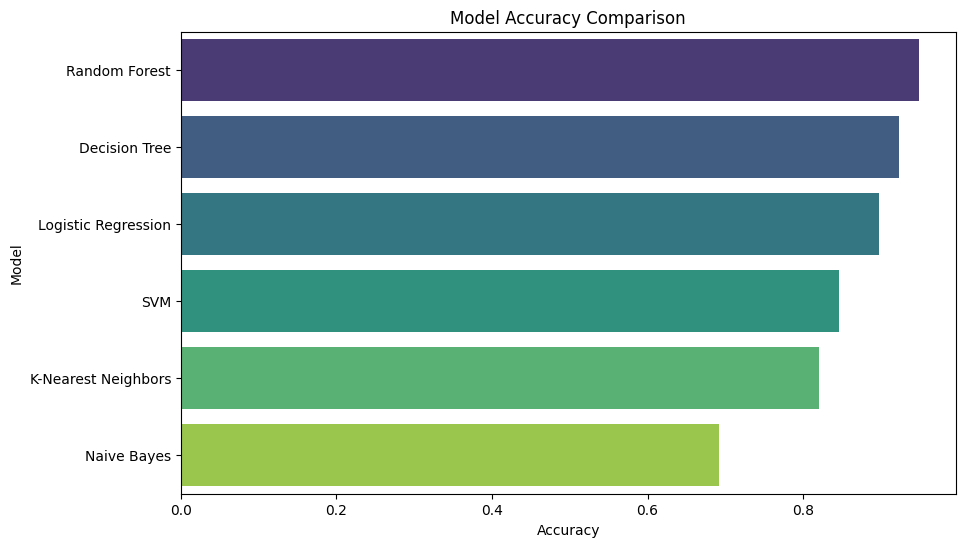

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, f1_score, precision_score, recall_score,
                             mean_absolute_error, mean_squared_error, r2_score, confusion_matrix)
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Dictionary to store results
results = {
    'Model': [],
    'Accuracy': [],
    'F1 Score': [],
    'Precision': [],
    'Recall': [],
    'MAE': [],
    'MSE': [],
    'R-Squared': [],
    'Confusion Matrix': []
}

# Train and evaluate each model
for name, clf in models.items():
    # Train the model
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Append results
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['F1 Score'].append(f1)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['MAE'].append(mae)
    results['MSE'].append(mse)
    results['R-Squared'].append(r2)
    results['Confusion Matrix'].append(cm)

# Convert results to a DataFrame for easier viewing
results_df = pd.DataFrame(results)
results_df.sort_values(by="Accuracy", ascending=False, inplace=True)

# Print the results DataFrame
print(results_df)

# Plotting model accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()